In [43]:
# import all the libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
# read in dataset
main_df = pd.read_csv('../data/preprocessed_main_dataset_rsample.csv')
affordable_df = pd.read_csv('../data/preprocessed_affordable_units_withZIP.csv')

# main_df
# print(affordable_df)
# affordable_df.head()

In [45]:
#### plot affordable housing marker map
# clean up the dataset to plot coordinates
affordable_df = affordable_df.replace(to_replace=['\(', '\)'], value="", regex=True)
affordable_df[['Latitude', 'Longitude', 'ZIP']] = affordable_df["coordinates"].str.split(",", expand=True)
# remove NA string in the dataset
affordable_df = affordable_df[affordable_df["Latitude"].str.contains("<NA>") == False]
# convert string type into float for coordinates
affordable_df['Latitude'] = affordable_df['Latitude'].astype(float)
affordable_df['Longitude'] = affordable_df['Longitude'].astype(float)

# plot the map using latitude and longitude
map = folium.Map(location=[affordable_df.iloc[0].Latitude, affordable_df.iloc[0].Longitude])
for i in range(0,len(affordable_df)):
    folium.CircleMarker(
      location=[affordable_df.iloc[i]['Latitude'], affordable_df.iloc[i]['Longitude']], radius=100,
      color = 'red'
   ).add_to(map)
map

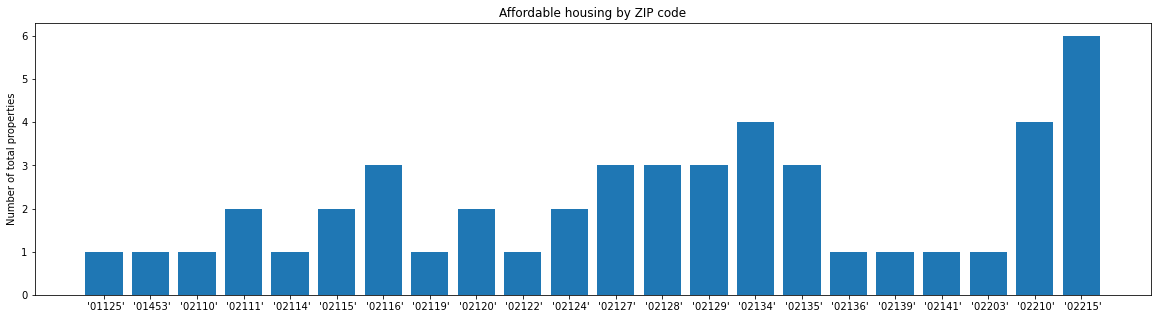

In [32]:
# plot a bar chart by zip code
fig, ax = plt.subplots(figsize=(20, 5))

zips = affordable_df['ZIP'].groupby(affordable_df['ZIP']).count()
labels = zips.keys()

ax.bar(labels, zips)
ax.set_ylabel("Number of total properties")
ax.set_title("Affordable housing by ZIP code")

plt.show()

In [33]:
#### plot additional "non-affordable" housing marker map
# clean up the dataset to plot coordinates
main_df = main_df.replace(to_replace=['\(', '\)'], value="", regex=True)
main_df = main_df[main_df["coordinates"].str.contains('<NA>') == False]
main_df[['Latitude', 'Longitude']] = main_df["coordinates"].str.split(",", expand=True).astype(float)

# plot the map using latitude and longitude
map = folium.Map(location=[main_df.iloc[0].Latitude, main_df.iloc[0].Longitude])
for i in range(0,len(main_df)):
    folium.CircleMarker(
      location=[main_df.iloc[i]['Latitude'], main_df.iloc[i]['Longitude']], radius=2,
      color = 'blue'
   ).add_to(map)
map

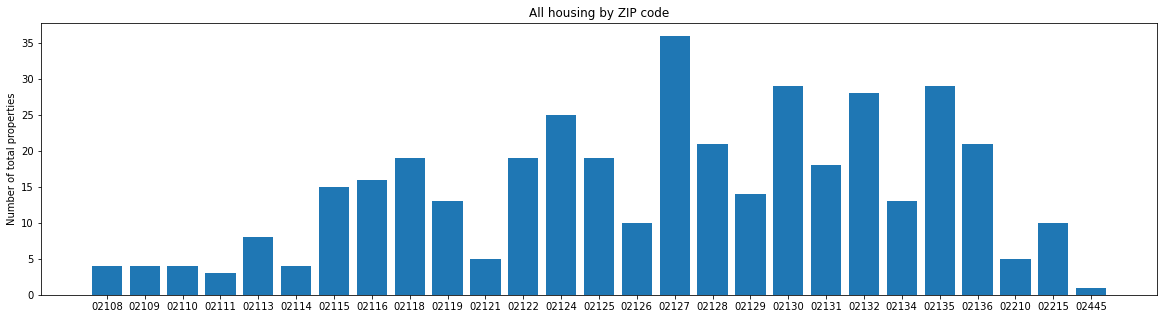

In [38]:
def fix_zip(zip):
    if len(zip) == 4:
        return '0' + zip
    else:
        return zip

# plot a bar chart by zip code
fig, ax = plt.subplots(figsize=(20, 5))

zips = main_df['ZIPCODE'].astype(str).groupby(main_df['ZIPCODE'].astype(str)).count()
labels = [fix_zip(z) for z in zips.keys()]

ax.bar(labels, zips)
ax.set_ylabel("Number of total properties")
ax.set_title("All housing by ZIP code")

plt.show()